## Importa bibliotecas

In [1]:
# !pip3 install wordcloud
# !conda install wordcloud -y

In [108]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk import tokenize


import seaborn as sns
from string import punctuation
import unidecode
# nltk.download("all")

## Importa dados

In [7]:
# https://www.kaggle.com/luisfredgs/imdb-ptbr?select=imdb-reviews-pt-br.csv
resenhas = pd.read_csv("imdb-reviews-pt-br.csv")
resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [8]:
treino, teste, classe_treino, classe_teste = train_test_split(resenhas.text_pt, 
                                                              resenhas.sentiment,
                                                              random_state=42)


In [9]:
regressao_logistica = LogisticRegression()

regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [10]:
print("resenha negativa:")
negativas = resenhas.query("sentiment == 'neg'")
negativas.text_pt[0]

resenha negativa:


'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [11]:
print("resenha positiva:")
positivas = resenhas.query("sentiment == 'pos'")
positivas.text_pt[12389]

resenha positiva:


'Eu fui e vi este filme ontem à noite depois de ser persuadido por alguns amigos meus. Eu admitiria que estava relutante em vê-lo porque, pelo que eu sabia de Ashton Kutcher, ele só conseguia fazer comédia. Eu estava errado. Kutcher interpretou o personagem de Jake Fischer muito bem, e Kevin Costner interpretou Ben Randall com tal profissionalismo. O sinal de um bom filme é que ele pode brincar com nossas emoções. Este fez exatamente isso. Todo o teatro que foi vendido foi superado pelo riso durante a primeira metade do filme, e foi levado às lágrimas durante o segundo semestre. Ao sair do teatro, eu não só vi muitas mulheres em lágrimas, mas também muitos homens adultos, tentando desesperadamente não deixar ninguém vê-los chorando. Este filme foi ótimo, e eu sugiro que você vá vê-lo antes de julgar.'

In [12]:
resenhas.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [13]:
classificacao = resenhas.sentiment.replace(["neg", "pos"], [0, 1])
classificacao.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [14]:
classificacao.tail()

49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, dtype: int64

In [15]:
resenhas["classificacao"] = classificacao
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [16]:
resenhas.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [17]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_woords = vetorizar.fit_transform(texto)
bag_of_woords

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [18]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [19]:
matriz_esparsa = pd.SparseDataFrame(bag_of_woords,
                                    columns=vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


In [20]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)
bag_of_words.shape

(49459, 156923)

In [21]:
# usa max_features
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)
bag_of_words.shape

(49459, 50)

In [22]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              classificacao,
                                                              random_state=42)

regressao_logistica = LogisticRegression()

regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(f"acuracia: {acuracia * 100} %")

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acuracia: 65.83097452486858 %


In [23]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                                  texto[coluna_classificacao],
                                                                  random_state=42)

    
    regressao_logistica = LogisticRegression()

    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [24]:
acuracia = classificar_texto(resenhas, "text_pt", "classificacao")
print(f"acuracia: {acuracia * 100} %")

acuracia: 65.83097452486858 %


In [25]:
todas_palavras = " ".join([texto for texto in resenhas.text_pt])
len(todas_palavras)

63448424

In [26]:
nuvem_palavras = WordCloud().generate(todas_palavras)
nuvem_palavras

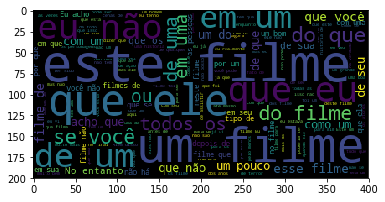

In [27]:
plt.figure()

plt.imshow(nuvem_palavras)
plt.show()

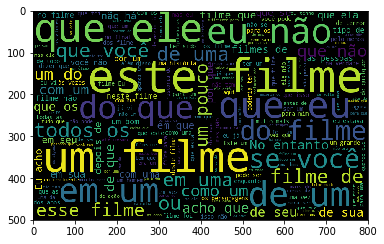

In [28]:
nuvem_palavras = WordCloud(width=800, 
                           height=500,
                           max_font_size=110).generate(todas_palavras)

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

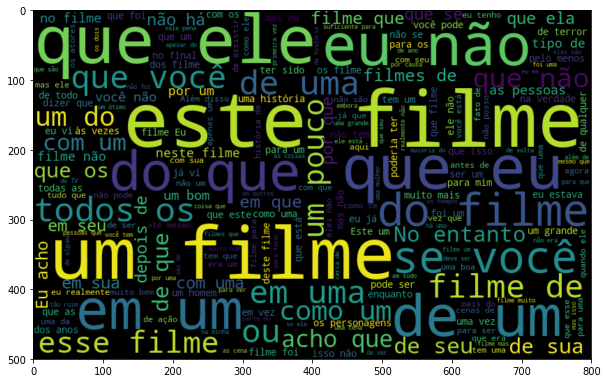

In [29]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

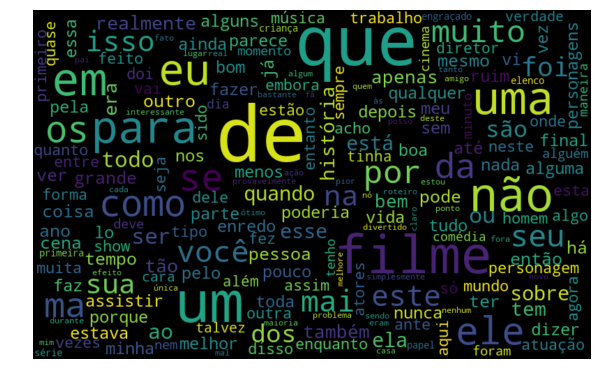

In [30]:
nuvem_palavras = WordCloud(width=800, 
                           height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
positivas = resenhas.query("sentiment == 'pos'")
negativas = resenhas.query("sentiment == 'neg'")

In [32]:
def gera_todas_palavras(resenhas):
    return " ".join([texto for texto in resenhas.text_pt])

In [33]:
def gera_word_cloud(todas_palavras):
    nuvem_palavras = WordCloud(width=800, 
                           height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

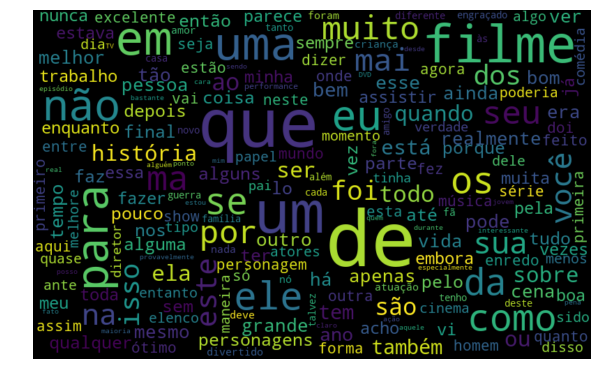

In [34]:
# positivas
gera_word_cloud(gera_todas_palavras(positivas))

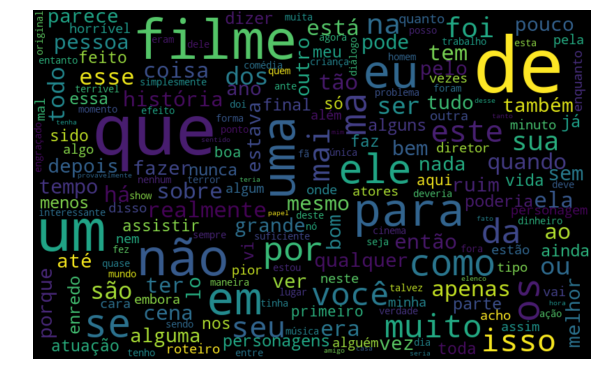

In [35]:
# negativas
gera_word_cloud(gera_todas_palavras(negativas))

In [36]:
frases = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frases)

frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [37]:
frase = "Bem vindo ao NLTK"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'NLTK']

In [38]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [39]:
df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                              "Frequencia": list(frequencia.values())})

df_frequencia.sample(10)

,Palavras,Frequencia
160454,Mamodo,6
10860,"deus,",73
82197,"apreciá-los,",1
95585,calculada,11
26220,Ranger.,16
208612,OBriens,5
7900,"Gomez""",1
209199,12.000,2
56132,caprichoso,24
335931,"Soups,",1


In [40]:
df_frequencia.nlargest(columns="Frequencia", n=10)

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


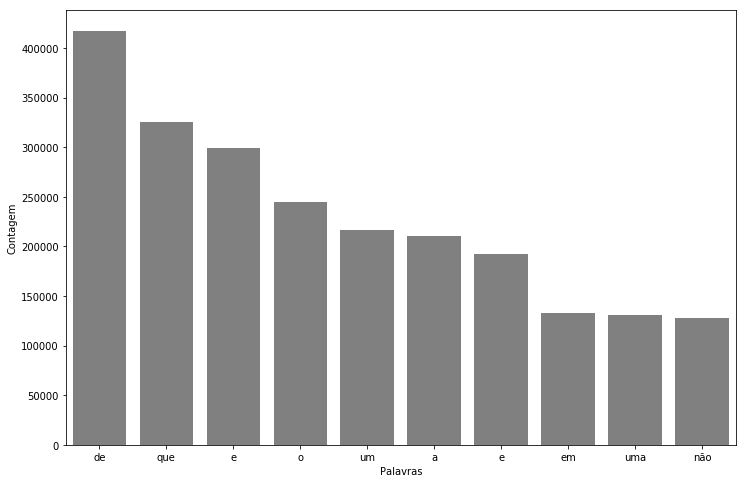

In [41]:
top_10 = df_frequencia.nlargest(columns="Frequencia", n=10)
plt.figure(figsize=(12,8))

ax = sns.barplot(data=top_10, 
                 x="Palavras", y="Frequencia",
                color="gray")
ax.set(ylabel="Contagem")
plt.show()

In [42]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = " ".join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    
    df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                                  "Frequencia": list(frequencia.values())})
    
    top_q = df_frequencia.nlargest(columns="Frequencia", n=quantidade)
    
    plt.figure(figsize=(12,8))

    ax = sns.barplot(data=top_q, 
                     x="Palavras", y="Frequencia",
                     color="gray")
    ax.set(ylabel="Contagem")
    plt.show()

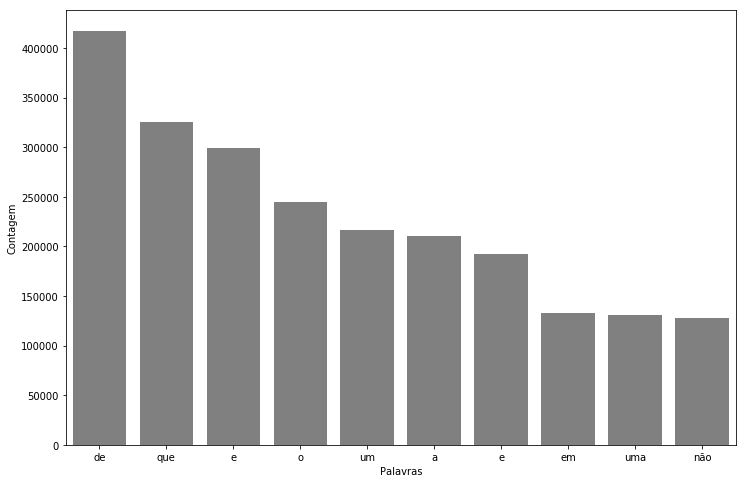

In [43]:
pareto(resenhas, "text_pt", 10)

In [44]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [45]:
frases_processadas = []
for opiniao in resenhas.text_pt:
    nova_frase = []
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frases_processadas.append(" ".join(nova_frase))
    
resenhas["tratamento_1"] = frases_processadas

In [46]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [47]:
acuracia = classificar_texto(resenhas, "tratamento_1", "classificacao")
print(f"acuracia {acuracia * 100} %")

acuracia 66.07359482410028 %


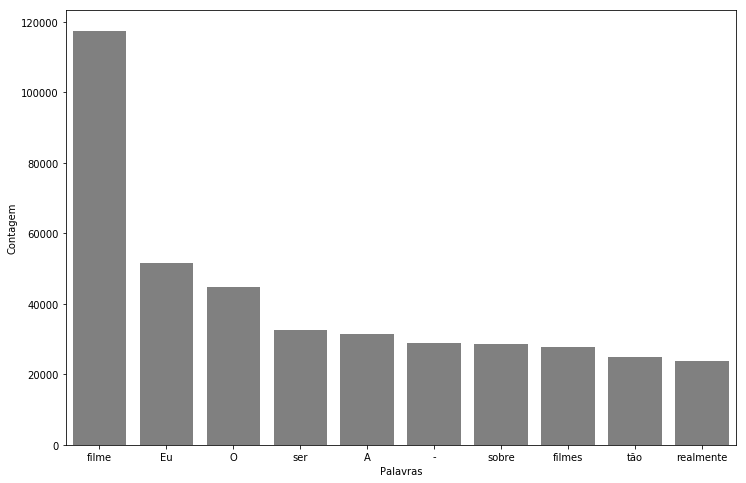

In [48]:
pareto(resenhas, "tratamento_1", 10)

In [49]:
frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Olá', 'mundo', '!']

In [55]:
pontuacao = list(punctuation)
pontuacao[:5]

['!', '"', '#', '$', '%']

In [70]:
pontuacao_stop_words = pontuacao + palavras_irrelevantes

frase_processada = []
for opiniao in resenhas.tratamento_1:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenhas['tratamento_2'] = frase_processada
resenhas.head()
    
    
    
    

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [71]:
resenhas.tratamento_2[33]

'Eu puxada filme início surpresa porque pretendia assistir nada Agora queria ter O suspense começa bem atropelamento fuga resultando morte questão saber culpado irá confessar ser descoberto factível agora apesar velhos tempos fazer cinema longe As tramas feitas antes trama tensões inerentes complicações motivações adicionais decorrentes caso amor ilícito contribuem primeiro semestre absorvente Então filme abandona atropelamento corre embarcar exposição nublada dois amores correspondidos sofridos As duas faixas enredo hit correr amor irracional suficiente fazer outro envolvem mesmos personagens liga los suficiente justificar partida linha história original O roteirista deveria ter escolhido enredo outro No final filme meio segundo funeral filme vi pensando Agora ver atropelamento fuga ?" Os cineastas podem achar resposta óbvia acho filme plotado executado flacidez'

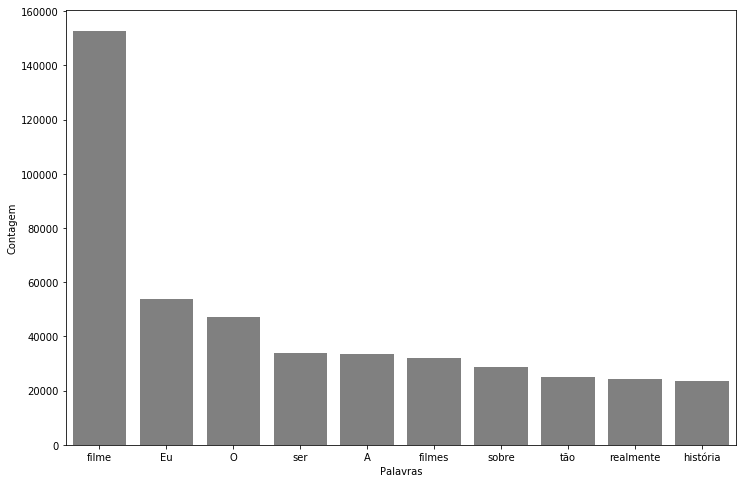

In [72]:
pareto(resenhas, 'tratamento_2', 10)

In [73]:
acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao e tao'

In [74]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenhas['tratamento_2']]

sem_acentos[:2]

['Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora',
 'Este exemplo motivo maioria filmes acao mesmos Generico chato nada valha pena assistir aqui Um completo desperdicio talentos Ice T Cubo Gelo mal aproveitados cada comprovando capazes atuar agir bem Nao incomode va ver New Jack City Ricochet assistir New York Undercover Ice T Boyz Hood Higher Learning Friday Ice Cube ver negocio re

In [75]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stop_words]

stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [76]:
resenhas["tratamento_3"] = sem_acentos

frase_processada = []
for opiniao in resenhas.tratamento_3:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenhas['tratamento_3'] = frase_processada
resenhas.head()



,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [77]:
acuracia_t3 = classificar_texto(resenhas, 'tratamento_3', 'classificacao')

print(f'acuracia: {acuracia_t3 * 100} %')

acuracia: 68.11160533764658 %


In [78]:
def nuvem_palavras(df, sentiment, column):
    df_q = df.query(f"sentiment == '{sentiment}'")
    todas_palavras = " ".join([texto for texto in resenhas[column]])
    gera_word_cloud(todas_palavras)

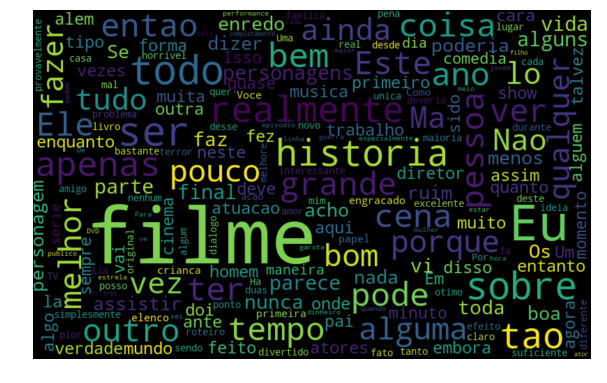

In [79]:
# nuvem palavras negativas
nuvem_palavras(resenhas, "neg", "tratamento_3")

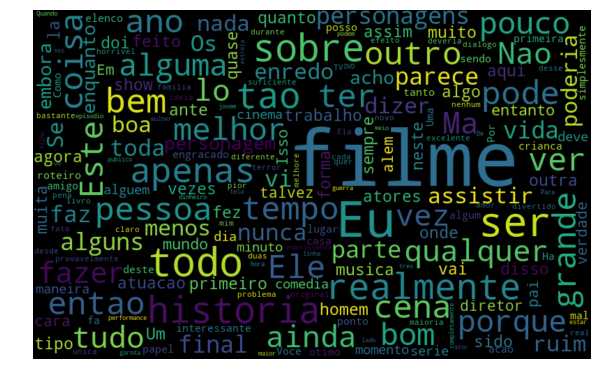

In [80]:
#nuvam palavras positivas
nuvem_palavras(resenhas, "pos", "tratamento_3")

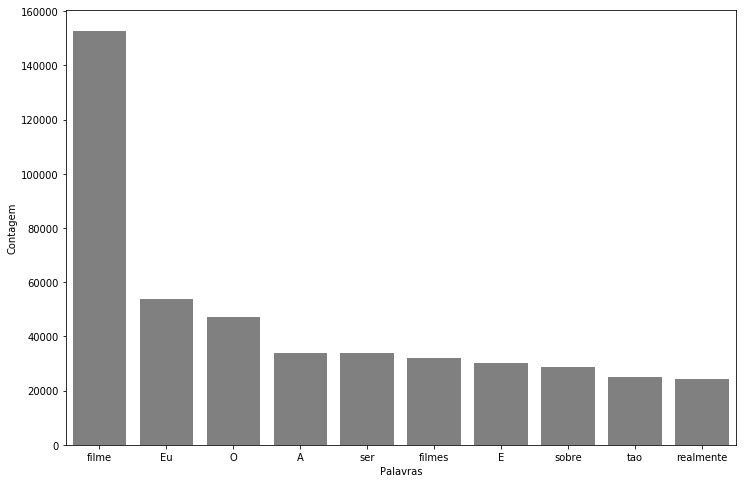

In [81]:
pareto(resenhas, "tratamento_3", 10)

In [82]:
frase = "Era uma vez um lugar chamado Narnia"
print(frase.lower())

era uma vez um lugar chamado narnia


In [90]:
frase_processada = []
for opiniao in resenhas.tratamento_3:
    nova_frase = []
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

frase_processada[0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [91]:
resenhas['tratamento_4'] = frase_processada
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [92]:
acuracia_t4 = classificar_texto(resenhas, 'tratamento_4', 'classificacao')

print(f'acuracia: {acuracia_t4 * 100} %')

acuracia: 68.79094217549535 %


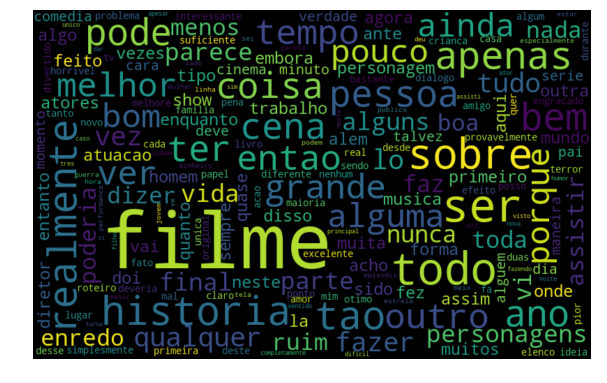

In [93]:
#nuvam palavras negativas
nuvem_palavras(resenhas, "neg", "tratamento_4")

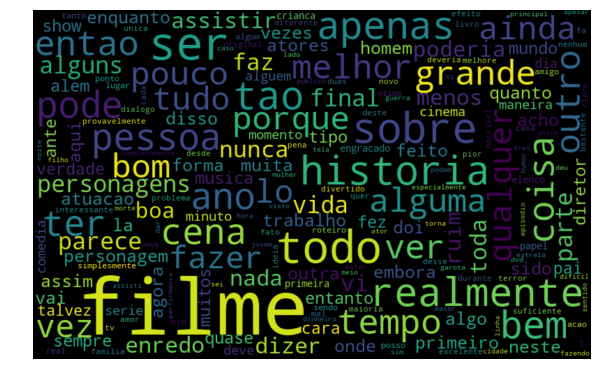

In [94]:
#nuvam palavras positivas
nuvem_palavras(resenhas, "pos", "tratamento_4")

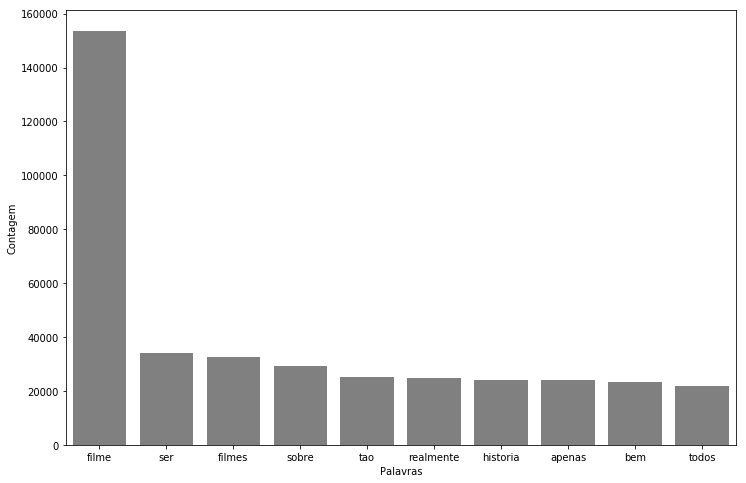

In [95]:
pareto(resenhas, 'tratamento_4', 10)

In [98]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

'corr'

In [99]:
frase_processada = []
for opiniao in resenhas.tratamento_4:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

frase_processada[0]

'vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual pouc simples import nenhum person maior fantasm armari person cost realiz log inici esquec tard import person deveri import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor mostr sinal armari desorden unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz deslig hor'

In [100]:
resenhas['tratamento_5'] = frase_processada
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [101]:
acuracia_t5 = classificar_texto(resenhas, 'tratamento_5', 'classificacao')

print(f"acuracia: {acuracia_t5 * 100} %")

acuracia: 69.43792964011323 %


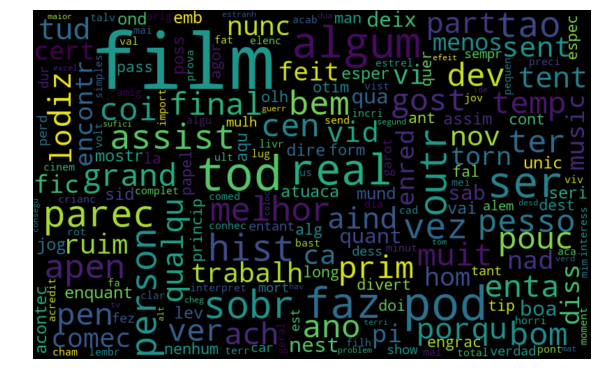

In [102]:
#nuvam palavras negativas
nuvem_palavras(resenhas, "neg", "tratamento_5")

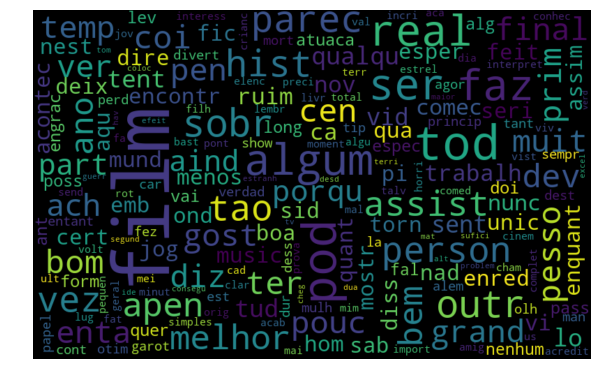

In [103]:
#nuvam palavras positivas
nuvem_palavras(resenhas, "pos", "tratamento_5")

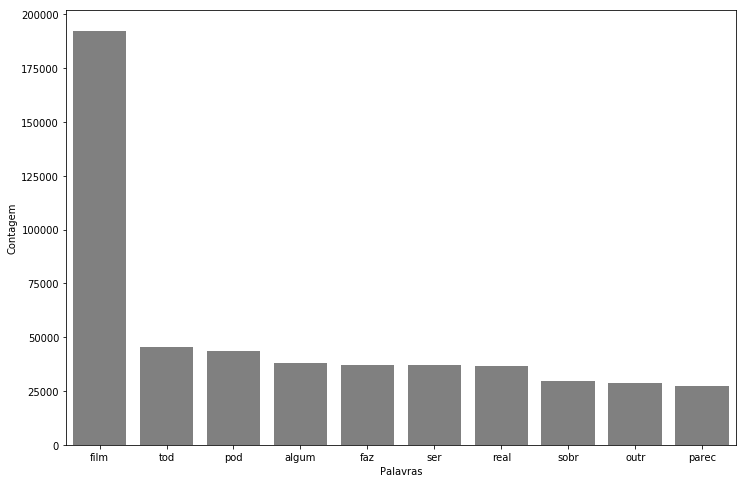

In [104]:
pareto(resenhas, 'tratamento_5', 10)

In [120]:
frases = ['Assisti um filme otimo', 'Assisti um filme pessimo']

tfidf = TfidfVectorizer(lowercase=True, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(),
            columns=tfidf.get_feature_names())

,assisti,filme,otimo,pessimo,um
0,0.448321,0.448321,0.630099,0.000000,0.448321
1,0.448321,0.448321,0.000000,0.630099,0.448321


In [123]:
tfidf_bruto = tfidf.fit_transform(resenhas["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                             resenhas.classificacao,
                                                             random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)

print(f'acuracia = {acuracia_tfidf * 100} %')


acuracia = 67.02790133441164 %


In [124]:
tfidf_dados_tratados = tfidf.fit_transform(resenhas["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_dados_tratados,
                                                              resenhas.classificacao,
                                                              random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)

print(f'acuracia = {acuracia_tfidf_tratados * 100} %')


acuracia = 69.87464617873029 %
